In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('DataScientist_cleaned.csv')

In [3]:
df.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Location,Headquarters,Size,Founded,Type of ownership,...,need_R,need_Python,big_data,visual_skills,need_sql,cloud_skills,Seniority_level,Job_Title_Cleaned,job_desc_len,num_competitors
0,0,Senior Data Scientist,111-181,"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,...,1,1,1,1,1,0,Senior,Data Scientist,3417,0
1,1,"Data Scientist, Product Analytics",111-181,"At Noom, we use scientifically proven methods ...",4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,...,0,1,0,0,1,0,na,Data Scientist,2350,0
2,2,Data Science Manager,111-181,Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.0,"New York, NY","New York, NY",1 to 50 employees,-1,-1,...,1,1,0,0,0,0,Senior,Data Science Manager,3157,0
3,3,Data Analyst,111-181,Sapphire Digital seeks a dynamic and driven mi...,3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,...,1,1,0,1,1,0,na,Data Analyst,2619,2
4,4,"Director, Data Science",111-181,"Director, Data Science - (200537)\nDescription...",3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,...,1,1,1,0,0,0,Senior,Data Science Director,2755,3


#### We forgot to change avg sal in Data Cleaning when we changed min_sal and max_sal, so let's do that here

In [4]:
df.avg_sal = df.apply(lambda x: x.avg_sal*2 if x.salary_hr==1 else x.avg_sal,axis=1)


### Exploratory Data Analysis

In [5]:
df.describe()

,index,Rating,Founded,salary_hr,min_sal,max_sal,avg_sal,job_in_hq,age_of_company,need_R,need_Python,big_data,visual_skills,need_sql,cloud_skills,job_desc_len,num_competitors
count,3905.000000,3905.000000,3905.000000,3905.000000,3905.000000,3905.000000,3905.000000,3905.000000,3905.000000,3905.000000,3905.000000,3905.000000,3905.000000,3905.000000,3905.000000,3905.000000,3905.000000
mean,2167.667350,3.282945,1478.795391,0.005378,82.038156,134.021767,108.029962,0.311140,35.316261,0.948015,0.532394,0.335723,0.209987,0.517542,0.301921,3572.473239,0.801793
std,1248.274307,1.576432,856.114692,0.073145,34.151390,44.671986,38.385725,0.463019,50.060410,0.222024,0.499013,0.472303,0.407351,0.499756,0.459150,2013.951293,1.281627
min,0.000000,-1.000000,-1.000000,0.000000,12.000000,52.000000,36.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,42.000000,0.000000
25%,1120.000000,3.200000,-1.000000,0.000000,54.000000,97.000000,75.000000,0.000000,-1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2114.000000,0.000000
50%,2163.000000,3.700000,1976.000000,0.000000,76.000000,129.000000,104.500000,0.000000,18.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,3306.000000,0.000000
75%,3250.000000,4.100000,2002.000000,0.000000,110.000000,165.000000,133.000000,1.000000,44.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,4687.000000,2.000000
max,4379.000000,5.000000,2020.000000,1.000000,200.000000,254.000000,225.000000,1.000000,395.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19895.000000,3.000000


##### Let's create a helper plot function.

In [6]:
def create_plot(column,h=6,w=15,title='Title'):    
    fig,ax = plt.subplots(1,2)
    ax[0].hist(column,bins=40)
    ax[1].boxplot(column)
    fig.set_figheight(h)
    fig.set_figwidth(w)
    plt.suptitle(title,fontsize=25);

##### Exploring different Features (Columns) of the Dataset

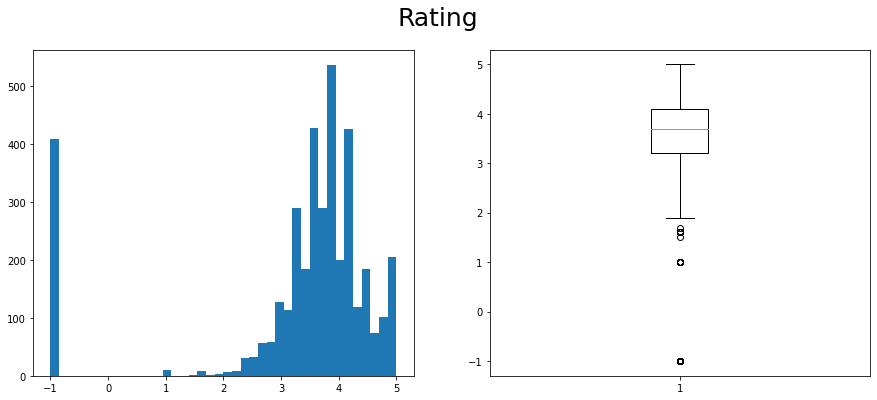

In [7]:
create_plot(df.Rating,title='Rating')
plt.savefig('Rating.png')

##### We see around 3.5 is the median rating and -1 rating is not possible and are NAN's .We gotta remove those.

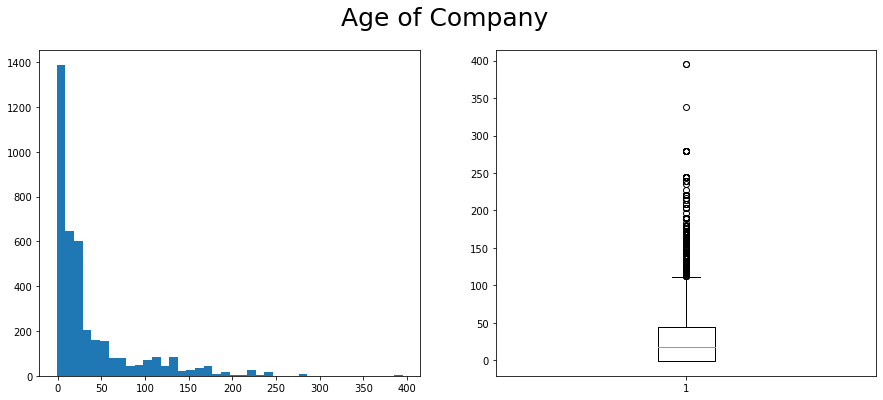

In [68]:
create_plot(df.age_of_company,title='Age of Company')

##### A lot of old companies have posted Data jobs

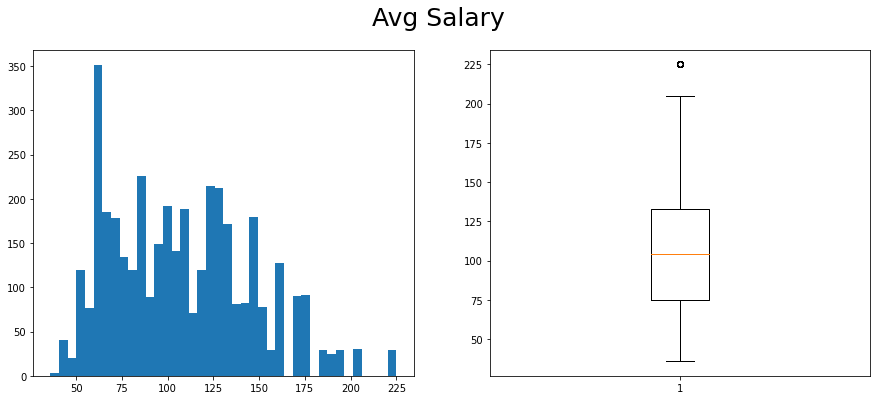

In [66]:
create_plot(df.avg_sal,title='Avg Salary')

##### Some jobs are giving whopping 225k (almost) ! ,some are as less as 25k , which i think might be Internships / fresher-jobs. While the Median Salary sits around  $100K.

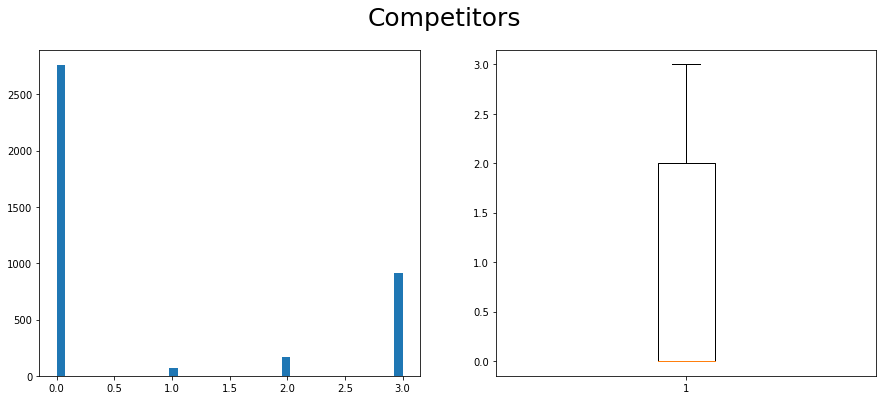

In [70]:
create_plot(df.num_competitors,title='Competitors')

##### A lot of job postings didn't have Competitors mentioned and which did, had only 1-3 competitor values.

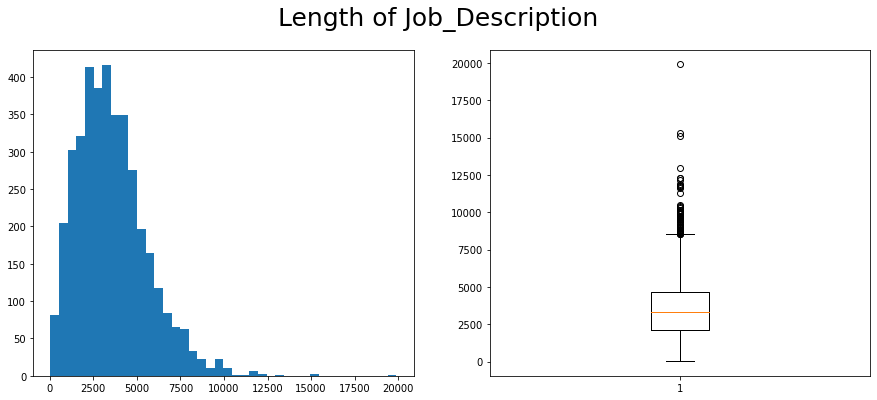

In [72]:
create_plot(df.job_desc_len,title='Length of Job_Description')

##### Around 3k-3.5k letters is the median length of job description (in terms of letters)

#### Let's look at the Average Salary and age of company together .

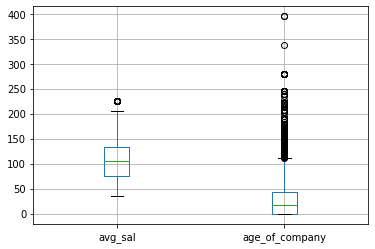

In [8]:
df.boxplot(['avg_sal','age_of_company'])
plt.savefig('ageVavg.png')

##### Are they Correlated ?

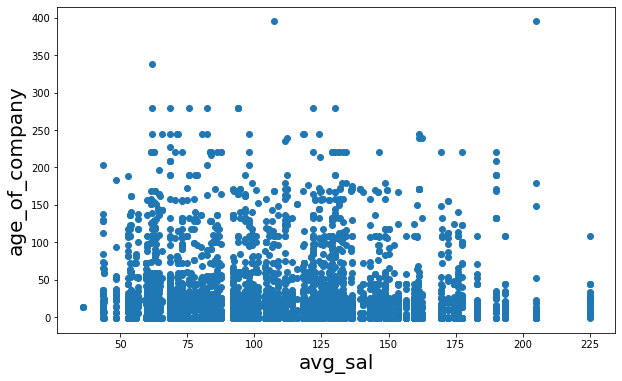

In [83]:
plt.figure(figsize=(10,6))
plt.scatter('avg_sal','age_of_company',data=df)
plt.xlabel('avg_sal',fontsize=20)
plt.ylabel('age_of_company',fontsize=20);

##### Looks slightly correlated, let's look at correlations now.

### Correlations

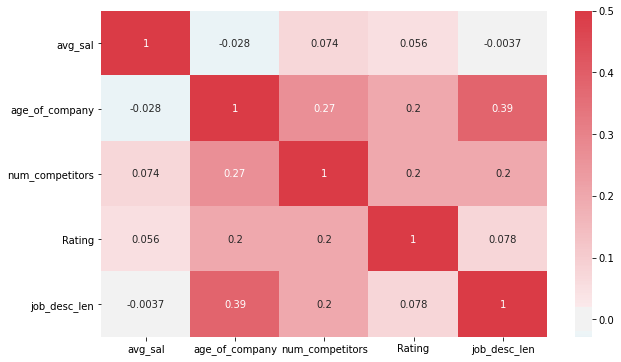

In [9]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.figure(figsize=(10,6))
sns.heatmap(df[['avg_sal','age_of_company','num_competitors','Rating','job_desc_len']].corr(),
            cmap=cmap,annot=True,vmax=.5,center=0)
plt.savefig('Correlations.png');

##### Looks like as the age of company increases, more is the job description length (maybe more responsibilities ?) and higher no. of competitors.

### Feature Visualizations

##### Let's look at the share of Different jobs in the market.  

In [32]:
temp = df.groupby('Job_Title_Cleaned')['Job_Title_Cleaned'].count()
temp = temp.sort_values()[-5:]

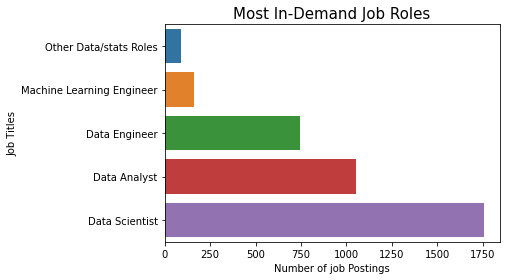

In [33]:
x = sns.barplot(temp.values,temp.index)
plt.title('Most In-Demand Job Roles',fontsize=15)
plt.ylabel('Job Titles')
plt.xlabel('Number of job Postings')
x.figure.savefig('jobs.png',bbox_inches='tight');

##### Job Description for different Data Science Roles

In [14]:
pd.DataFrame(df.groupby('Job_Title_Cleaned').job_desc_len.agg(('sum')).sort_values())

,job_desc_len
Job_Title_Cleaned,
Data Science Consultant,78385
Data Science Architect,110287
Data Science Manager,113451
Data Science Director,118088
Other Data/stats Roles,253594
Machine Learning Engineer,479882
Data Engineer,2205637
Data Analyst,3490942
Data Scientist,7100242


##### Are Data science jobs mostly for Experienced people or Freshers?

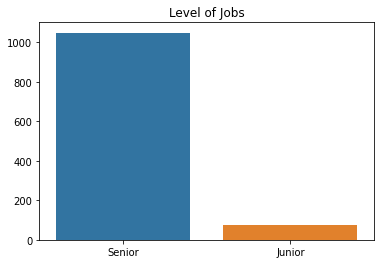

In [13]:
temp = df.Seniority_level.value_counts()[1:]
sns.barplot(temp.index,temp.values)
plt.title('Level of Jobs');

##### Mostly for experienced/higher level guys i guess .

##### What are Top Programming Languages / Tools in Data Science ?

In [34]:
skill_col = ['need_R', 'need_Python', 'big_data',
       'visual_skills', 'need_sql', 'cloud_skills']

In [35]:
temp = df[skill_col].sum()
temp.index=['R','Python','Big Data Tools','Data Visualization Tools','SQL','Cloud/Deployment Tools']
temp = temp.sort_values(ascending=False)

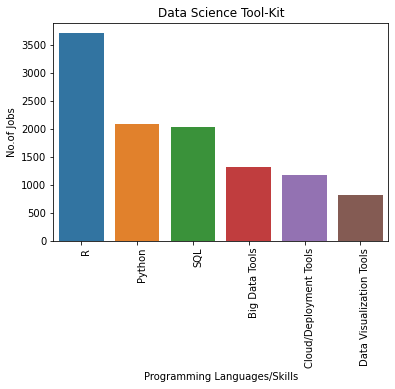

In [38]:
# plt.figure()
sns.barplot(temp.index,temp.values)
plt.xticks(rotation = 90,rotation_mode = "anchor",ha = "right")
plt.title('Data Science Tool-Kit')
plt.xlabel('Programming Languages/Skills')
plt.ylabel('No.of Jobs')
plt.savefig('Top_tools.png',bbox_inches='tight');

##### Looks like R is everybody's Favourite!!  ,whereas Python and Sql are equally important. Tableau/Power BI etc don't look so important ,Although it depends largely on company. 

##### What is the type of Organizations hiring for these Companies ?

In [39]:
temp = df[df['Type of ownership']!='-1']['Type of ownership'].value_counts().sort_values(ascending=False)

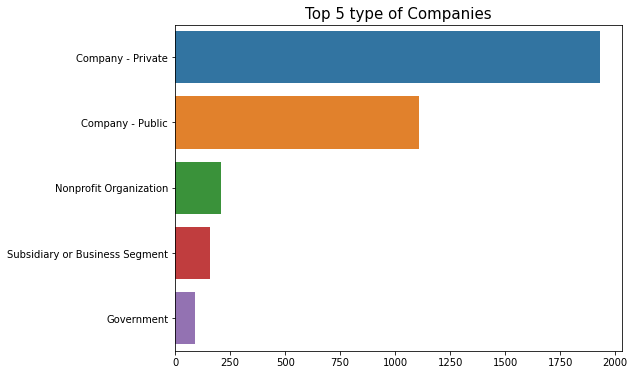

In [40]:
plt.figure(figsize=(8,6))
sns.barplot(temp.values[:5],temp.index[:5])
plt.title('Top 5 type of Companies',fontsize=15);

##### Most job postings are by Private and Public companies.

##### What size of Companies are mostly hiring guys for Data-roles ?

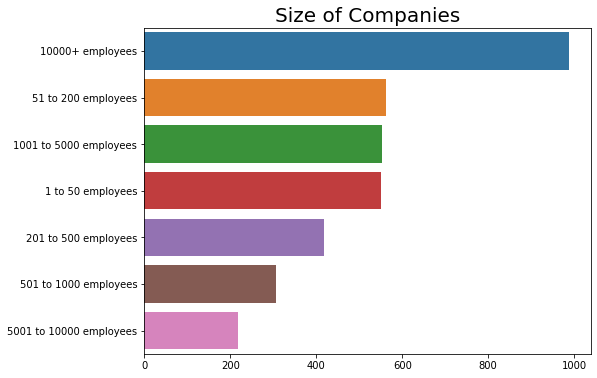

In [41]:
temp = df.Size[df.Size!='-1'].value_counts()
plt.figure(figsize=(8,6))
sns.barplot(temp.values,temp.index)
plt.title('Size of Companies',fontsize=20);

##### Mosly Large companies are hiring data scientists/analysts ,maybe because they have a lot of data.

##### What is the Revenue of most companies Hiring?

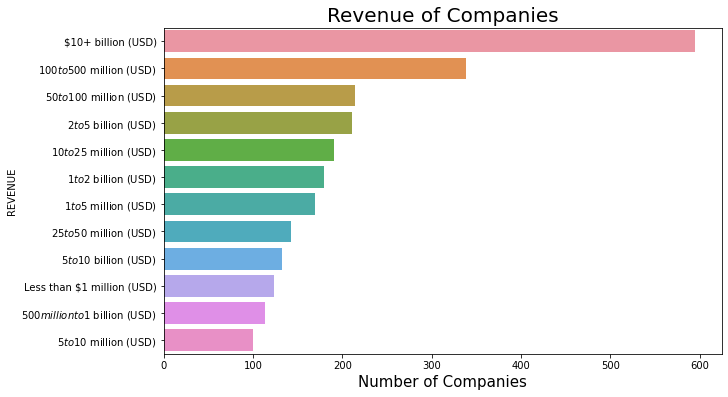

In [238]:
temp = df.Revenue.value_counts()[1:]
plt.figure(figsize=(10,6))
sns.barplot(temp.values,temp.index)
plt.xlabel('Number of Companies',fontsize=15)
plt.ylabel('REVENUE')
plt.title('Revenue of Companies',fontsize=20);

##### Again Big-Companies are hiring the most

##### What states are having most number of openings ?

In [347]:
temp = df.job_state.value_counts()

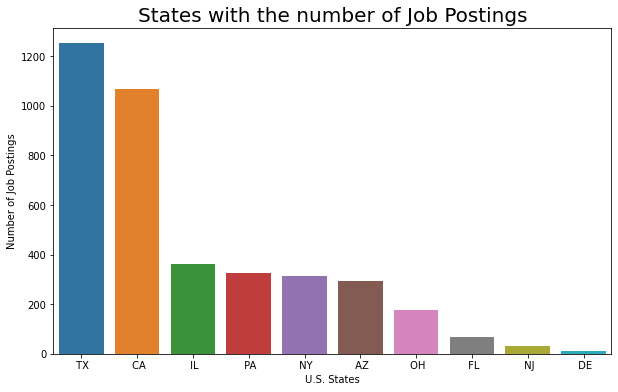

In [348]:
plt.figure(figsize=(10,6))
sns.barplot(temp.index,temp.values)
plt.xlabel('U.S. States')
plt.ylabel('Number of Job Postings')
plt.title('States with the number of Job Postings',fontsize=20);

##### Texas wins here !

##### What are the states that have most number of openings (Job-role wise) ?

In [42]:
temp = pd.DataFrame(df.groupby(['job_state','Job_Title_Cleaned']).Job_Title_Cleaned.count())

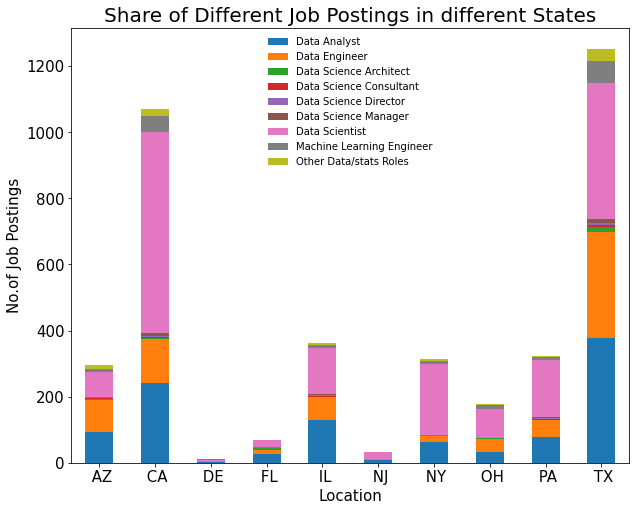

In [44]:
labels=['Data Analyst','Data Engineer','Data Science Architect',
                  'Data Science Consultant','Data Science Director',
                  'Data Science Manager','Data Scientist','Machine Learning Engineer',
                  'Other Data/stats Roles']
temp.unstack().plot(kind='bar',figsize=(10,8),stacked=True,legend=None,fontsize=15)
plt.legend(labels=labels,frameon=False)
plt.xlabel('Location',fontsize=15)
plt.ylabel('No.of Job Postings',fontsize=15)
plt.title('Share of Different Job Postings in different States',fontsize=20)
plt.xticks(rotation=0)
plt.savefig('statewise_role.png',bbox_inches='tight');

##### Ok, so California has a lot of Data Scientist openings whereas Texas has a lot of openings overall and also the most number of roles for Data analysts and Data engineers.

##### Which Industry rolls out Highest number of Jobs ?

In [45]:
temp = df.Industry.value_counts()[1:11]

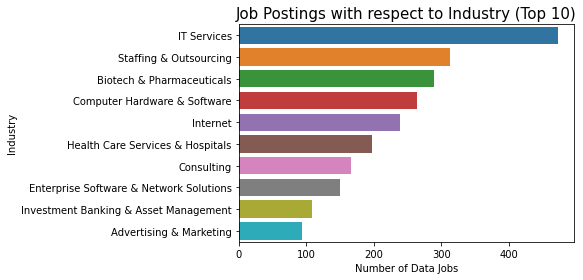

In [46]:
sns.barplot(temp.values,temp.index)
plt.xlabel('Number of Data Jobs')
plt.ylabel('Industry')
plt.title('Job Postings with respect to Industry (Top 10)',fontsize=15);

##### IT Services have most number of openings.

##### Which Sector rolls out Highest number of Jobs ?

In [47]:
temp = df.Sector[df.Sector!='-1'].value_counts()[:10]

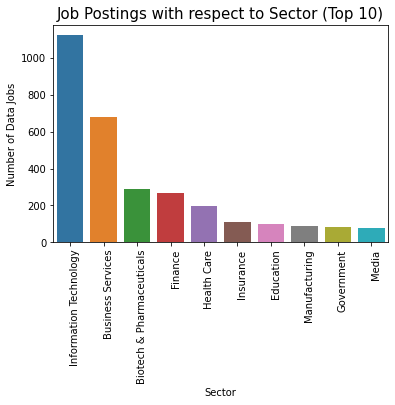

In [48]:
sns.barplot(temp.index,temp.values)
plt.xlabel('Sector')
plt.ylabel('Number of Data Jobs')
plt.title('Job Postings with respect to Sector (Top 10)',fontsize=15)
plt.xticks(rotation = 90,rotation_mode = "anchor",ha = "right");

##### Information Technology and Business need  a lot of Data Scientist/Analysts.

#### We've seen a lot by just looking at just the count of jobs now let's look at who pays best?

##### Which Sector Pays best?

In [50]:
temp = df[df.Sector!='-1'].groupby('Sector').avg_sal.mean().sort_values(ascending=False)[:10]

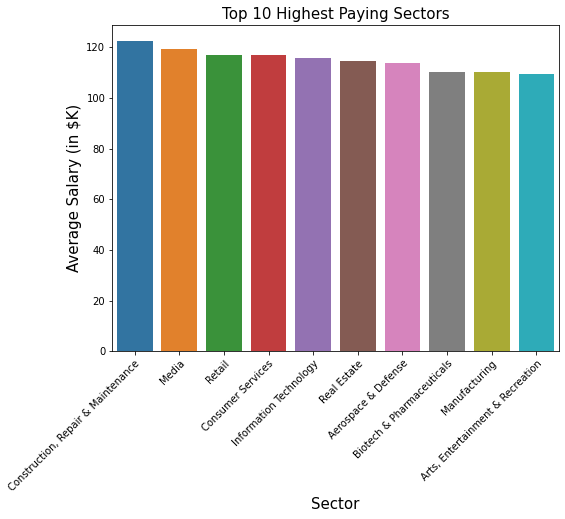

In [406]:
plt.figure(figsize=(8,6))
sns.barplot(temp.index,temp.values)
plt.xlabel('Sector',fontsize = 15)
plt.ylabel('Average Salary (in $K)',fontsize=15)
plt.title('Top 10 Highest Paying Sectors',fontsize=15)
plt.xticks(rotation = 45,rotation_mode = "anchor",ha = "right");

##### Hmm.. that's interesting. Construction, Repair & Maintenance pay the most followed by Media, pushing IT sector to the 5th Position.

##### Which Industry pays best?

In [52]:
temp = df[df.Industry!='-1'].groupby('Industry').avg_sal.mean().sort_values(ascending=False)[:10]
pd.DataFrame(temp)

,avg_sal
Industry,
Beauty & Personal Accessories Stores,176.000000
Consumer Electronics & Appliances Stores,156.500000
Transportation Equipment Manufacturing,143.772727
Grantmaking Foundations,134.000000
Commercial Equipment Rental,133.000000
Video Games,131.933333
Food Production,131.500000
Internet,131.277311
Home Furniture & Housewares Stores,130.000000


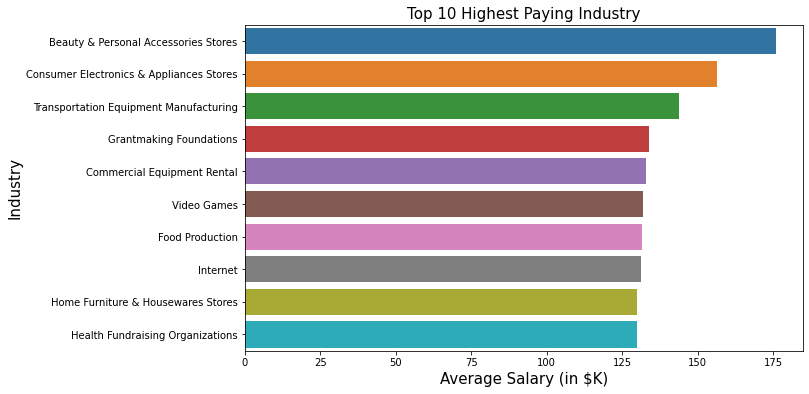

In [55]:
plt.figure(figsize=(10,6))
sns.barplot(temp.values,temp.index)
plt.ylabel('Industry',fontsize = 15)
plt.xlabel('Average Salary (in $K)',fontsize=15)
plt.title('Top 10 Highest Paying Industry',fontsize=15);

##### Beauty & Personal Accessories Stores industry pays the most. It's interesting to see that the Video Games industry is also investing a lot in Analytics. 

##### Highest paying profile ?

In [59]:
temp = df.groupby('Job_Title_Cleaned').avg_sal.mean().sort_values()
pd.DataFrame(temp)

,avg_sal
Job_Title_Cleaned,
Data Science Architect,89.586207
Data Science Consultant,96.750000
Data Science Director,100.695652
Data Engineer,100.862416
Data Analyst,101.096866
Other Data/stats Roles,104.264368
Machine Learning Engineer,111.144172
Data Scientist,115.408495
Data Science Manager,124.241379


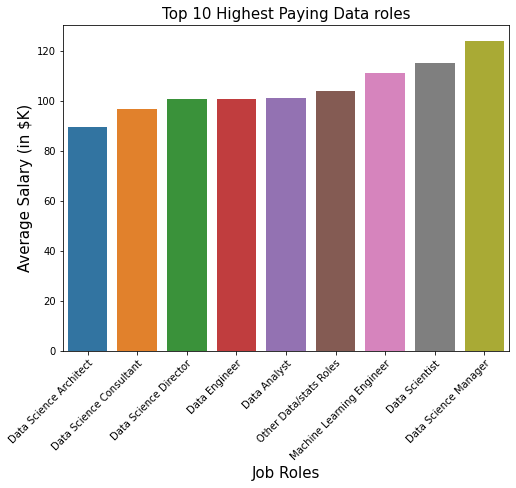

In [412]:
plt.figure(figsize=(8,6))
sns.barplot(temp.index,temp.values)
plt.xlabel('Job Roles',fontsize = 15)
plt.ylabel('Average Salary (in $K)',fontsize=15)
plt.title('Top 10 Highest Paying Data roles',fontsize=15)
plt.xticks(rotation = 45,rotation_mode = "anchor",ha = "right");

##### Looks like Managers are paid a lot!

#### Let's look at the top 3 roles stats

In [60]:
temp = df[(df.Job_Title_Cleaned == 'Data Scientist')|(df.Job_Title_Cleaned == 'Data Analyst')|(df.Job_Title_Cleaned == 'Data Engineer')]                   

In [61]:
temp = pd.DataFrame(temp.groupby(['job_state','Job_Title_Cleaned']).avg_sal.mean())
temp

avg_sal
job_state Job_Title_Cleaned            
 AZ       Data Analyst        92.441489
          Data Engineer       95.804124
          Data Scientist     105.894737
 CA       Data Analyst       129.315353
          Data Engineer      129.740602
          Data Scientist     134.378713
 DE       Data Analyst       190.000000
          Data Engineer       92.833333
          Data Scientist     135.400000
 FL       Data Analyst        76.611111
          Data Engineer       78.208333
          Data Scientist      77.333333
 IL       Data Analyst        76.804688
          Data Engineer       93.685714
          Data Scientist      87.035461
 NJ       Data Analyst        96.312500
          Data Engineer       95.000000
          Data Scientist     128.977273
 NY       Data Analyst       139.674603
          Data Engineer      130.970588
          Data Scientist     135.037383
 OH       Data Analyst        90.911765
          Data Engineer       78.858974
          Data Scientist     102.778409
 PA       Data Analyst        93.506410
          Data Engineer       93.903846
          Data Scientist      96.605263
 TX       Data Analyst        91.178100
          Data Engineer       95.137500
          Data Scientist     100.176829

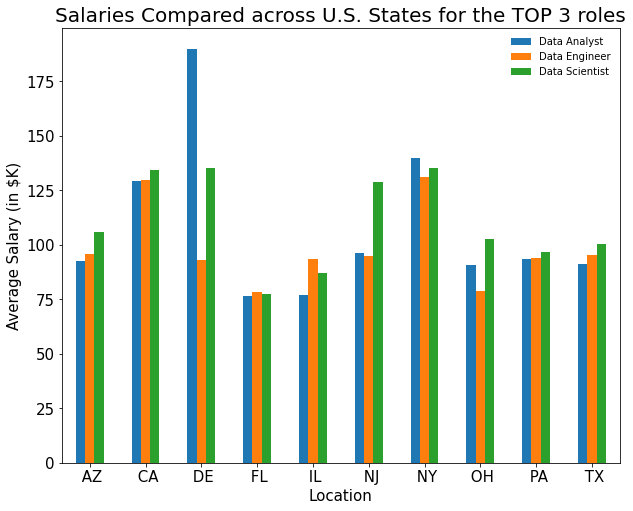

In [62]:
temp.unstack().plot(kind='bar',figsize=(10,8),legend=None,fontsize=15)
plt.legend(labels=['Data Analyst','Data Engineer','Data Scientist'],frameon=False)
plt.xlabel('Location',fontsize=15)
plt.ylabel('Average Salary (in $K)',fontsize=15)
plt.title('Salaries Compared across U.S. States for the TOP 3 roles',fontsize=20)
plt.xticks(rotation=0)
plt.savefig('3role_sal.png',bbox_inches='tight');

##### Most of the states pay Data Scientists the most, but surprisingly `Delaware` pays a lot more to the Analysts

### Pivot Tables

#### Do we need **Python / R / Sql** for companies which have high Revenue ?

In [68]:
temp = df[(df.Revenue!='-1')&(df.Revenue!='Less than $1 million (USD)')&(df.Revenue!='$1 to $5 million (USD)')&(df.Revenue!='$5 to $10 million (USD)')]             
pd.pivot_table(temp,index='Revenue',columns=['need_Python'],values='avg_sal',aggfunc='count')

need_Python,0,1
Revenue,,
$1 to $2 billion (USD),99,81
$10 to $25 million (USD),94,97
$10+ billion (USD),218,377
$100 to $500 million (USD),155,183
$2 to $5 billion (USD),132,79
$25 to $50 million (USD),57,86
$5 to $10 billion (USD),59,74
$50 to $100 million (USD),121,93
$500 million to $1 billion (USD),57,57


In [69]:
pd.pivot_table(temp,index='Revenue',columns=['need_R'],values='avg_sal',aggfunc='count')

need_R,0,1
Revenue,,
$1 to $2 billion (USD),3,177
$10 to $25 million (USD),25,166
$10+ billion (USD),7,588
$100 to $500 million (USD),20,318
$2 to $5 billion (USD),5,206
$25 to $50 million (USD),6,137
$5 to $10 billion (USD),3,130
$50 to $100 million (USD),10,204
$500 million to $1 billion (USD),1,113


In [70]:
pd.pivot_table(temp,index='Revenue',columns=['need_sql'],values='avg_sal',aggfunc='count')

need_sql,0,1
Revenue,,
$1 to $2 billion (USD),97,83
$10 to $25 million (USD),102,89
$10+ billion (USD),285,310
$100 to $500 million (USD),137,201
$2 to $5 billion (USD),126,85
$25 to $50 million (USD),65,78
$5 to $10 billion (USD),62,71
$50 to $100 million (USD),84,130
$500 million to $1 billion (USD),67,47


> Looks like these companies need all the three tools , with **R** being the most important.  

#### What job roles require what skills ?

In [72]:
pd.pivot_table(df,index='Job_Title_Cleaned',columns=['need_R'],values='avg_sal',aggfunc='count')

need_R,0,1
Job_Title_Cleaned,,
Data Analyst,64.0,989.0
Data Engineer,58.0,687.0
Data Science Architect,NaN,29.0
Data Science Consultant,NaN,22.0
Data Science Director,NaN,23.0
Data Science Manager,1.0,28.0
Data Scientist,39.0,1715.0
Machine Learning Engineer,18.0,145.0
Other Data/stats Roles,23.0,64.0


In [73]:
pd.pivot_table(df,index='Job_Title_Cleaned',columns=['need_Python'],values='avg_sal',aggfunc='count')

need_Python,0,1
Job_Title_Cleaned,,
Data Analyst,710,343
Data Engineer,212,533
Data Science Architect,16,13
Data Science Consultant,10,12
Data Science Director,8,15
Data Science Manager,12,17
Data Scientist,755,999
Machine Learning Engineer,64,99
Other Data/stats Roles,39,48


In [74]:
pd.pivot_table(df,index='Job_Title_Cleaned',columns=['need_sql'],values='avg_sal',aggfunc='count')

need_sql,0,1
Job_Title_Cleaned,,
Data Analyst,375,678
Data Engineer,210,535
Data Science Architect,4,25
Data Science Consultant,9,13
Data Science Director,12,11
Data Science Manager,15,14
Data Scientist,1112,642
Machine Learning Engineer,87,76
Other Data/stats Roles,60,27


In [75]:
pd.pivot_table(df,index='Job_Title_Cleaned',columns=['big_data'],values='avg_sal',aggfunc='count')

big_data,0,1
Job_Title_Cleaned,,
Data Analyst,903,150
Data Engineer,241,504
Data Science Architect,17,12
Data Science Consultant,12,10
Data Science Director,6,17
Data Science Manager,16,13
Data Scientist,1229,525
Machine Learning Engineer,104,59
Other Data/stats Roles,66,21


In [76]:
pd.pivot_table(df,index='Job_Title_Cleaned',columns=['visual_skills'],values='avg_sal',aggfunc='count')

visual_skills,0,1
Job_Title_Cleaned,,
Data Analyst,661,392
Data Engineer,586,159
Data Science Architect,19,10
Data Science Consultant,16,6
Data Science Director,20,3
Data Science Manager,27,2
Data Scientist,1524,230
Machine Learning Engineer,154,9
Other Data/stats Roles,78,9


In [77]:
pd.pivot_table(df,index='Job_Title_Cleaned',columns=['cloud_skills'],values='avg_sal',aggfunc='count')

cloud_skills,0,1
Job_Title_Cleaned,,
Data Analyst,878,175
Data Engineer,302,443
Data Science Architect,11,18
Data Science Consultant,18,4
Data Science Director,16,7
Data Science Manager,22,7
Data Scientist,1307,447
Machine Learning Engineer,107,56
Other Data/stats Roles,65,22


##### Results  
>- Python and Sql are mostly needed for Data scientist, Data engineer and machine learning roles.  
>- Big Data Tools are used by Data Engineers mostly.  
>- Visual Tools are used by Analysts.
>- Cloud and deployment skills are again mostly needed by Data Engineers and Architects. 
>- R programming is surprisingly used by Everyone.

#### Lastly let's see the difference in salary among junior and senior roles

In [458]:
pd.pivot_table(df,index='Job_Title_Cleaned',columns='Seniority_level',values='avg_sal',aggfunc='mean')

Seniority_level,Junior,Senior,na
Job_Title_Cleaned,,,
Data Analyst,107.028846,97.892405,101.687173
Data Engineer,118.500000,103.009036,99.926186
Data Science Architect,NaN,91.200000,89.250000
Data Science Consultant,NaN,96.611111,96.846154
Data Science Director,NaN,100.695652,NaN
Data Science Manager,NaN,124.241379,NaN
Data Scientist,89.884615,119.574627,113.830705
Machine Learning Engineer,NaN,97.484375,114.480916
Other Data/stats Roles,NaN,119.291667,101.860000


NaN Tells there are no junior/na positions for that job

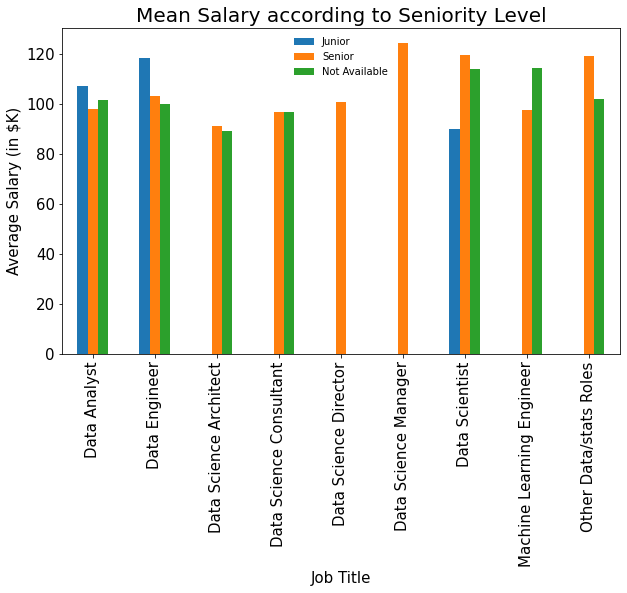

In [89]:
temp = pd.DataFrame(df.groupby(['Job_Title_Cleaned','Seniority_level']).avg_sal.mean())
temp.unstack().plot(kind='bar',figsize=(10,6),fontsize=15)
plt.legend(labels=['Junior','Senior','Not Available'],frameon=False)
plt.xlabel('Job Title',fontsize=15)
plt.ylabel('Average Salary (in $K)',fontsize=15)
plt.title('Mean Salary according to Seniority Level',fontsize=20);

>- We see Junior / Fresher roles are availabel only for analyst , engineer and junior data scientist level positions .   
>- Machine Learning Engineers also take experienced guys.  
>- And obviously Directors and Managers won't have any junior positions.  


Note - For many positions Seniority level information was not available so we cannot be certain.

In [ ]:
# wordcloud

In [90]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [98]:
def show_cloud(data):
    data = ' '.join([sent for sent in data])
    cleaned_data = ' '.join([word for word in data.split()]) 
    stop_words = stopwords.words('english')
    wordcloud = WordCloud(stopwords=stop_words,background_color='white',
                      width=2500,
                      height=2000
                     ).generate(cleaned_data)
    plt.figure(1,figsize=(10, 7))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    wordcloud.to_file('common_words.png')

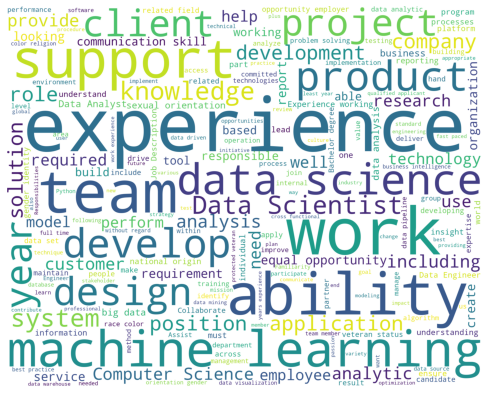

In [99]:
show_cloud(df['Job Description'])

> Looks like Experience , Machine Learning Algorithms knowledge and soft skills like Team-work are very important.